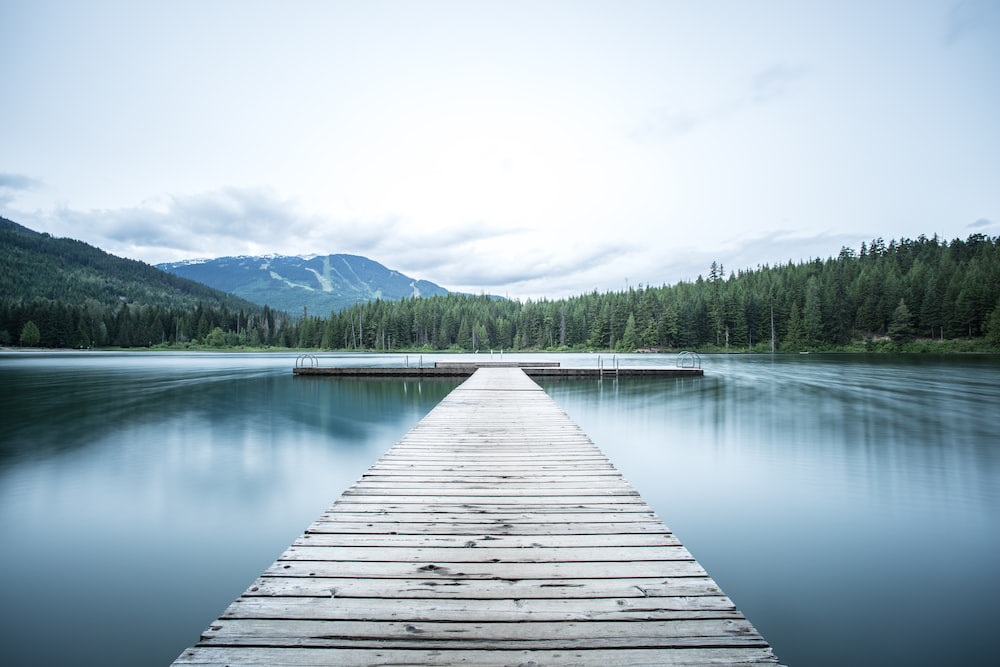

In [1]:
import requests
from PIL import Image

image_url = "https://llava-vl.github.io/static/images/view.jpg"
image = Image.open(requests.get(image_url, stream=True).raw)
image

In [2]:
import torch
from transformers import BitsAndBytesConfig

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16
)

In [6]:
from transformers import pipeline

model_id = "llava-hf/llava-1.5-7b-hf"

pipe = pipeline("image-to-text", model=model_id, device_map="cuda", model_kwargs={"quantization_config": quantization_config})

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

In [7]:
max_new_tokens = 200
prompt = "USER: <image>\n What are the things I should be cautious about when I visit this place?\n ASSISTANT:"

outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})

In [8]:
outputs

[{'generated_text': 'USER:  \n What are the things I should be cautious about when I visit this place?\n ASSISTANT: When visiting this place, which is a pier or dock extending over a body of water, there are a few things to be cautious about. First, be aware of the weather conditions, as sudden changes in weather can make the pier unsafe to walk on. Second, be mindful of the water depth and any potential hazards, such as submerged rocks or debris, that could cause accidents or injuries. Additionally, be cautious of the presence of wildlife, such as birds or fish, and avoid disturbing their natural habitats. Lastly, be aware of any local regulations or guidelines for the use of the pier, as some areas might be restricted or prohibited for certain activities.'}]